# (Ford GoBike System Data)
## by (Salma Gouda)

## Investigation Overview

> The overall goal of my presentation is to illustrate how different features interact with trip duration.

## Dataset Overview

> The datasets contains 174,952 trips further detailed in 13 columns ('duration_sec', 'start_time', 'end_time', 'start_station_name', 'end_station_name', 'bike_id', 'user_type', 'member_birth_year', 'member_gender', 'bike_share_for_all_trip', 'age', 'month', 'duration_min'). Some variables are numeric in nature, while others are categorical.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
gobike = pd.read_csv('fordgobike-clean.csv')
gobike.head()

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,duration_min
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,1984,Male,False,35,869.750000
1,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,1972,Male,False,47,1030.900000
2,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,1989,Other,False,30,608.166667
3,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,1974,Male,True,45,26.416667
4,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,Broadway at Kearny,5200,Subscriber,1959,Male,False,60,29.883333


## (Visualization 1)

> What's the distribution of different ages? 
>- The age distribution histogram is rightly skewed with a peak around 28 to 32 ages.
>- We can conclude that the larger no. of trips and trip durations belong to people around 30 as most users in the dataset are around this age.

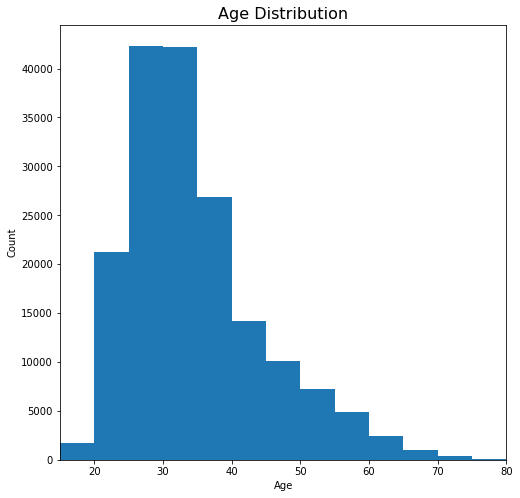

In [3]:
plt.figure(figsize=[8,8])

base_color = sb.color_palette()[0]

bins = np.arange(0, gobike['age'].max()+5,5)

plt.hist(data=gobike, x='age', color=base_color, bins= bins)

plt.title('Age Distribution', fontsize = 16)
plt.xlabel('Age')
plt.ylabel('Count')
plt.xlim(15,80);

## (Visualization 2)

> What's the count of each gender in different user types?
>- The bar plot shows that male count is much more higher than female count in both user types.
>- In conclusion, there are higher contributions of the male gender because the users in this dataset are mostly males.

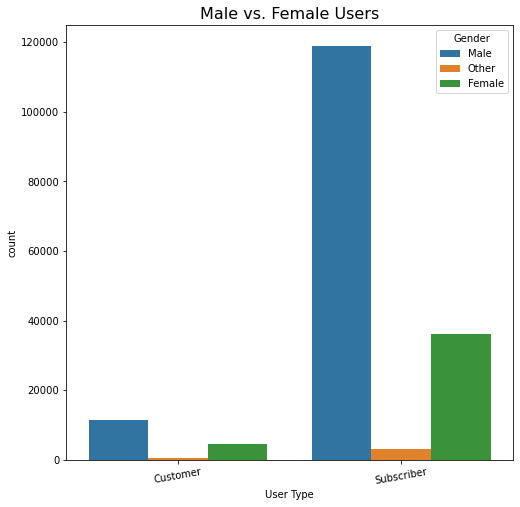

In [4]:
plt.figure(figsize=[8,8])

sb.countplot(data=gobike, x='user_type', hue='member_gender')
plt.xlabel('User Type')
plt.xticks(rotation=10)
plt.legend(title='Gender')
plt.title('Male vs. Female Users', fontsize = 16);

## (Visualization 3)

>- How does the no. of trips change among users of different ages?
>- For both subscribers and customers, the number of trips decreases as age increases, with a peak around the age of 30.

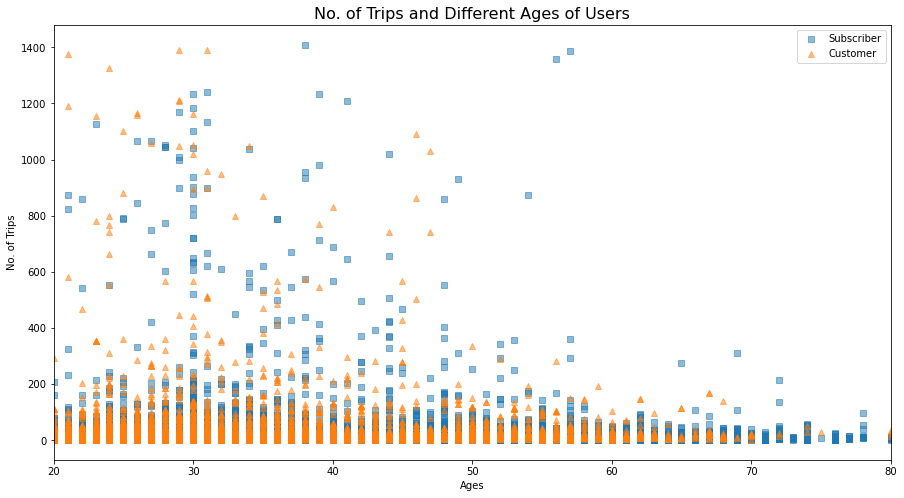

In [5]:
plt.figure(figsize=[15,8])

cat_markers = [['Subscriber', 's'],['Customer', '^']]
               
for cat, marker in cat_markers:
               gobike_cat = gobike[gobike['user_type'] == cat]
               plt.scatter(data=gobike_cat, x='age', y='duration_min', marker=marker, alpha=0.5)
               plt.legend(['Subscriber','Customer'])
plt.xlabel('Ages')
plt.xlim(20,80)
plt.ylabel('No. of Trips')
plt.title('No. of Trips and Different Ages of Users', fontsize=16);